In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [163]:
len_10kmn_df=pd.read_csv('10km/gamma_res_time.csv') 
len_10kmn_df.sort_values('turn',inplace=True,ignore_index=True)

In [164]:
len_10kmn_df['est_phase']=np.arcsin((len_10kmn_df['pmt2']-len_10kmn_df['pmt1'])/(len_10kmn_df['pmt1']+len_10kmn_df['pmt2'])*1.0)
len_10kmn_df['phase']=len_10kmn_df['turn']*4*np.pi
_temp=np.arcsin(np.sin(len_10kmn_df['phase']))
len_10kmn_df['temp_phase']=_temp
len_10kmn_df['est_phase_unwrap']=len_10kmn_df['phase']+(_temp - len_10kmn_df['est_phase'])

In [165]:
collection_time=100 #s
valid_time=collection_time*20e-9/500e-6
flux_photon=np.mean(len_10kmn_df['pmt1']+len_10kmn_df['pmt2'])
shot_noise=1/np.sqrt(flux_photon)

In [166]:
shot_noise

0.024265800446975495

In [167]:
len_10kmn_df

,turn,state,start(ps),end(ps),pmt1,pmt2,g,phase,est_phase,temp_phase,est_phase_unwrap
0,0.100,origin,480000,546000,39,1623,-95.31%,1.256637,1.263215,1.256637e+00,1.250059
1,0.125,origin,480000,546000,16,1629,-98.05%,1.570796,1.373230,1.570796e+00,1.768363
2,0.200,origin,480000,546000,385,1372,-56.18%,2.513274,0.596503,6.283185e-01,2.545089
3,0.300,origin,480000,546000,1378,330,61.36%,3.769911,-0.660590,-6.283185e-01,3.802183
4,0.375,origin,480000,546000,1662,23,97.27%,4.712389,-1.336596,-1.570796e+00,4.478189
5,0.400,origin,480000,546000,1625,70,91.74%,5.026548,-1.161508,-1.256637e+00,4.931419
6,0.500,origin,480000,546000,795,941,-8.41%,6.283185,0.084201,-2.449294e-16,6.198984


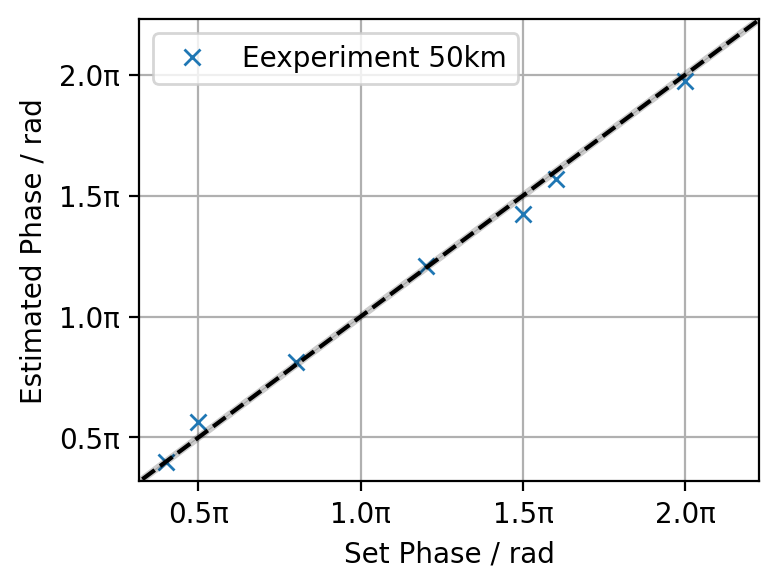

In [168]:
set_phase_list=np.linspace(0, max(len_10kmn_df['phase'])*1.5,100)
plt.figure(figsize=(4,3),dpi=200)
plt.plot(len_10kmn_df['phase'],len_10kmn_df['est_phase_unwrap'] ,'x', label='Eexperiment 50km')
plt.plot(set_phase_list,set_phase_list,'k--')
plt.plot(set_phase_list,set_phase_list+shot_noise,color='k',alpha=0.2)
plt.plot(set_phase_list,set_phase_list-shot_noise,color='k',alpha=0.2)
plt.xlabel('Set Phase / rad')
plt.ylabel('Estimated Phase / rad')
plt.xlim(1,7)
plt.ylim(1,7)

# 新增：将 x 轴刻度格式化为 π 单位
from matplotlib.ticker import FuncFormatter
fmt = FuncFormatter(lambda x, pos: f"{x/np.pi:.1f}π")
ax = plt.gca()
ax.xaxis.set_major_formatter(fmt)
ax.yaxis.set_major_formatter(fmt)
# 可选：设置主刻度为 0.5π 间隔
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(np.pi/2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(np.pi/2))
plt.grid()
plt.legend()

(1.0, 7.0)

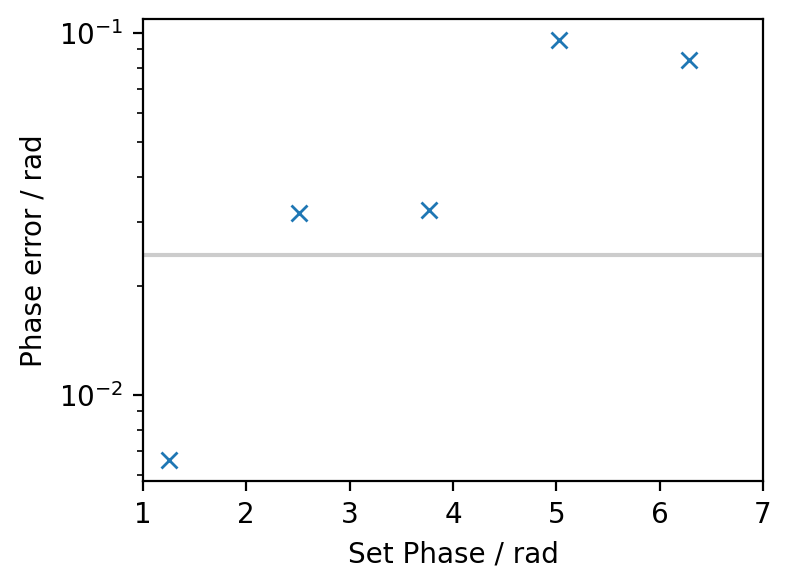

In [169]:
plt.figure(figsize=(4,3),dpi=200)
_index=(len_10kmn_df['turn']!=0.125)&(len_10kmn_df['turn']!=0.375)
plt.plot(len_10kmn_df['phase'][_index],np.abs((len_10kmn_df['est_phase_unwrap']-len_10kmn_df['phase'])[_index]) ,'x', label='Eexperiment 50km')
plt.plot(set_phase_list,shot_noise*np.ones_like(set_phase_list),color='k',alpha=0.2)
plt.yscale('log')
plt.xlabel('Set Phase / rad')
plt.ylabel('Phase error / rad')
plt.xlim(1,7)